In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

# Sample Data Generation (replace with your actual data from ClickHouse)
np.random.seed(42)  # for reproducibility
n_samples = 200
algorithms = ['Algorithm A', 'Algorithm B', 'Algorithm C']
data = []

for algo in algorithms:
    if algo == 'Algorithm A':
        scores = np.random.normal(70, 10, n_samples)  # Mean 70, std dev 10
        confidences = scores + np.random.normal(0, 5, n_samples) # Add some noise
    elif algo == 'Algorithm B':
        scores = np.random.normal(75, 8, n_samples)  # Slightly higher mean, less std dev
        confidences = scores + np.random.normal(0, 3, n_samples) # Less noise
    else: # Algorithm C
        scores = np.random.normal(65, 12, n_samples)
        confidences = scores + np.random.normal(0, 7, n_samples)

    for i in range(n_samples):
        data.append({'algorithm': algo, 'sample_id': i, 'score': scores[i], 'confidence': confidences[i]})

df = pd.DataFrame(data)



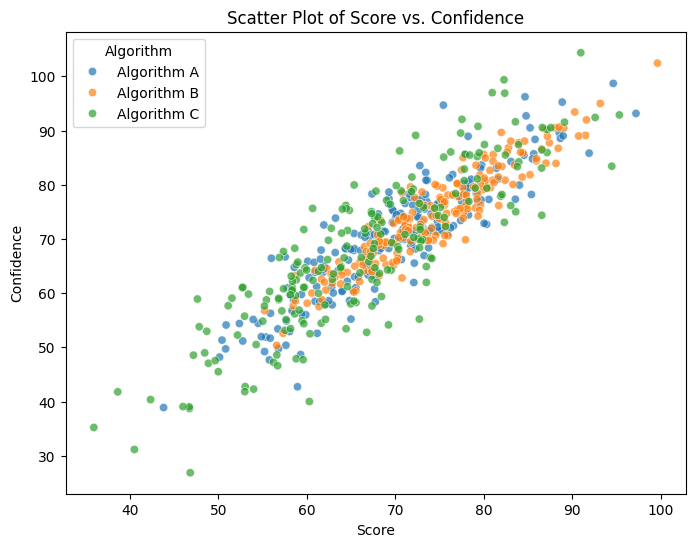

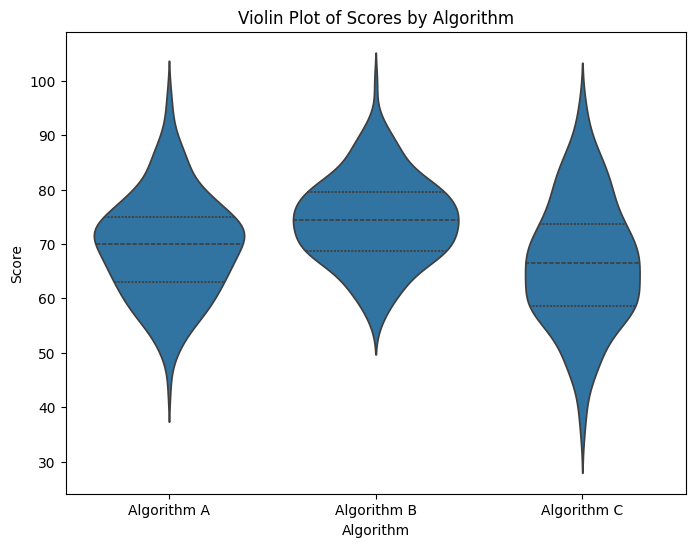

T-test between Algorithm A and Algorithm B:
T-statistic: -5.45455680774527
P-value: 8.755411644060752e-08


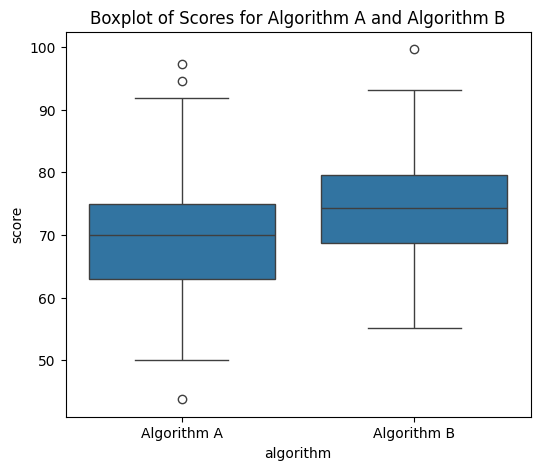

In [5]:
# 1. Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="score", y="confidence", hue="algorithm", alpha=0.7)  # alpha for transparency
plt.title("Scatter Plot of Score vs. Confidence")
plt.xlabel("Score")
plt.ylabel("Confidence")
plt.legend(title="Algorithm")
plt.show()

# 2. Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x="algorithm", y="score", inner="quartile")  # inner="quartile" shows quartiles within
plt.title("Violin Plot of Scores by Algorithm")
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.show()

# 3. T-test (example for two algorithms)
algo1 = 'Algorithm A'
algo2 = 'Algorithm B'
scores1 = df[df['algorithm'] == algo1]['score']
scores2 = df[df['algorithm'] == algo2]['score']
t_statistic, p_value = ttest_ind(scores1, scores2, equal_var=False)  # Welch's t-test
print(f"T-test between {algo1} and {algo2}:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# You don't visualize the t-test itself as a plot; the results are printed.
# However, you could visualize the distributions that the t-test compares (e.g., with boxplots).
plt.figure(figsize=(6, 5))
sns.boxplot(x='algorithm', y='score', data=df[df['algorithm'].isin([algo1, algo2])])
plt.title(f"Boxplot of Scores for {algo1} and {algo2}")
plt.show()

<Figure size 1000x1000 with 0 Axes>

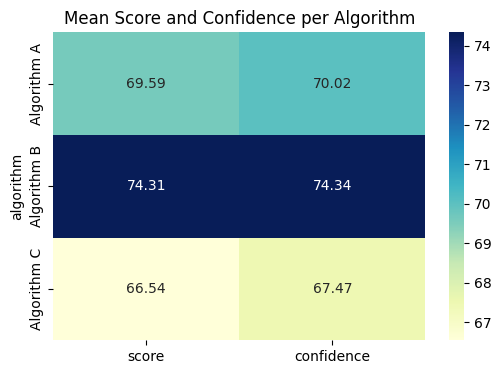

In [8]:
# 4. Pair Plot 
plt.figure(figsize=(10, 10))  # Adjust figure size as needed
sns.pairplot(df, hue="algorithm", diag_kind="kde")  # kde on the diagonal
plt.suptitle("Pair Plot of Score and Confidence (by Algorithm)", y=1.02) # Title adjustment
plt.show()


# 5. Heatmap (for correlation between variables)
correlation_matrix = df.pivot_table(index='sample_id', columns='algorithm', values=['score', 'confidence']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")  # annot=True shows correlation values
plt.title("Correlation Heatmap")
plt.show()

heatmap_data = df.groupby('algorithm')[['score', 'confidence']].mean()

plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Mean Score and Confidence per Algorithm")
plt.show()